# Múltiplos Regressores

In [11]:
! pip install prophet==1.1.5 plotly

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

CSV_URL_TEMP_DELI_TRAIN = 'https://github.com/allanspadini/livro-val-allan/raw/main/DailyDelhiClimateTrain.csv'

df_deli = pd.read_csv(CSV_URL_TEMP_DELI_TRAIN, parse_dates=['date'])

df_deli.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [13]:
from plotly import express as px

px.scatter_3d(df_deli, 
              x='humidity',
              y='date',
              z='meantemp',
              color='meanpressure',
              color_continuous_scale='greys',
              size='wind_speed')

In [14]:
df_deli = df_deli.query('meanpressure < 7000')

px.scatter_3d(df_deli, 
              x='humidity',
              y='date',
              z='meantemp',
              color='meanpressure',
              color_continuous_scale='greys',
              size='wind_speed')

In [15]:
fig = px.imshow(abs(df_deli.iloc[:, 1:].corr()), 
                color_continuous_scale='greys')
fig.show()

In [17]:
df_train = df_deli.rename(columns=dict(meantemp='y',
                                       date='ds'))

df_train.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [20]:
CSV_URL_TEMP_DELI_TEST = 'https://github.com/allanspadini/livro-val-allan/raw/main/DailyDelhiClimateTest.csv'

df_test = pd.read_csv(CSV_URL_TEMP_DELI_TEST, parse_dates=['date'])
df_test = df_test.rename(columns=dict(meantemp='y',
                                      date='ds'))
df_test.head()

,ds,y,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [22]:
model = Prophet()

model.fit(df_train)

df_future = model.make_future_dataframe(periods=114, freq='D')

predictions = model.predict(df_future)

predictions.head()

22:08:19 - cmdstanpy - INFO - Chain [1] start processing
22:08:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.655928,9.115695,14.213645,24.655928,24.655928,-12.943418,-12.943418,-12.943418,0.033411,0.033411,0.033411,-12.976829,-12.976829,-12.976829,0.0,0.0,0.0,11.712510
1,2013-01-02,24.656274,9.215540,14.553813,24.656274,24.656274,-12.806307,-12.806307,-12.806307,0.145551,0.145551,0.145551,-12.951859,-12.951859,-12.951859,0.0,0.0,0.0,11.849967
2,2013-01-03,24.656620,9.307941,14.472709,24.656620,24.656620,-12.845302,-12.845302,-12.845302,0.066364,0.066364,0.066364,-12.911666,-12.911666,-12.911666,0.0,0.0,0.0,11.811319
3,2013-01-04,24.656966,9.122276,14.291841,24.656966,24.656966,-12.831555,-12.831555,-12.831555,0.026661,0.026661,0.026661,-12.858216,-12.858216,-12.858216,0.0,0.0,0.0,11.825411
4,2013-01-05,24.657312,8.986540,14.252352,24.657312,24.657312,-12.863597,-12.863597,-12.863597,-0.070074,-0.070074,-0.070074,-12.793522,-12.793522,-12.793522,0.0,0.0,0.0,11.793715


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Text(116.97222222222221, 0.5, 'Temperatura (°C)')

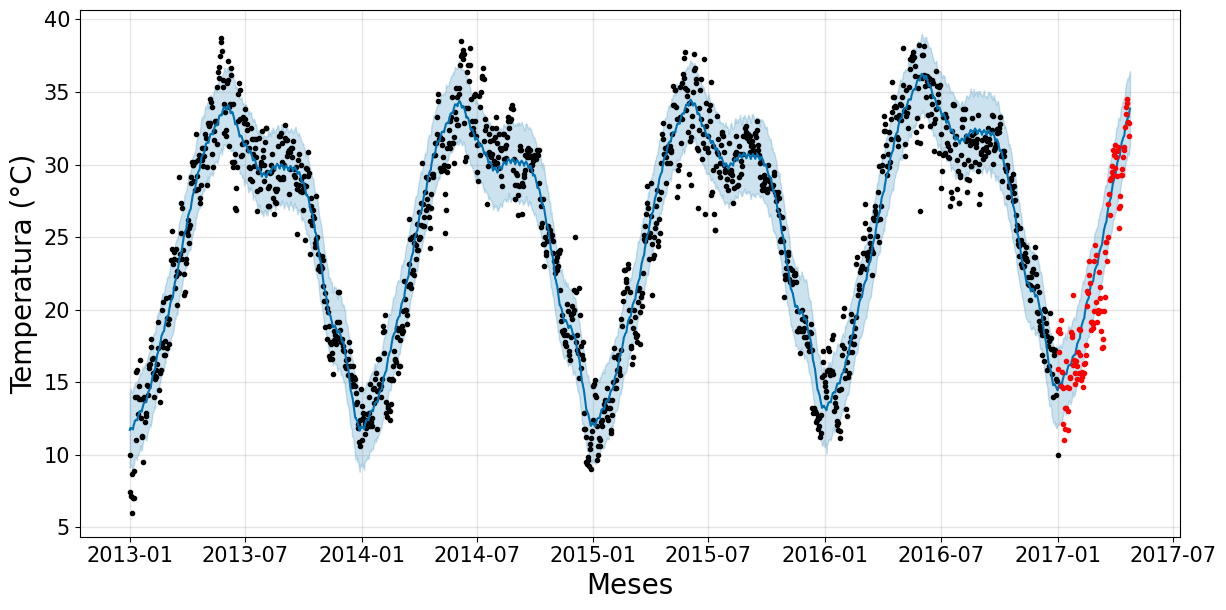

In [23]:
fig = model.plot(predictions, figsize=(12,6))

plt.plot(df_test['ds'], 
         df_test['y'],
         '.r')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Meses', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_train['y'], predictions.loc[:1460, 'yhat'])

1.6026063645805568

In [27]:
mean_absolute_error(df_test['y'], predictions.loc[1461:, 'yhat'])

2.261720473322412

In [34]:
model = Prophet()

model.add_regressor('humidity')

model.fit(df_train)

df_future = model.make_future_dataframe(periods=114, freq='D')

df_future['humidity'] = pd.concat([df_train['humidity'],
                                   df_test['humidity']]).values

predictions = model.predict(df_future)

predictions.head()

22:15:00 - cmdstanpy - INFO - Chain [1] start processing
22:15:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,humidity,humidity_lower,humidity_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,23.966040,8.076140,12.352694,23.966040,23.966040,-13.707542,-13.707542,-13.707542,-2.837044,-2.837044,-2.837044,-2.837044,-2.837044,-2.837044,0.002656,0.002656,0.002656,-10.873154,-10.873154,-10.873154,0.0,0.0,0.0,10.258498
1,2013-01-02,23.972949,7.475693,11.619351,23.972949,23.972949,-14.476535,-14.476535,-14.476535,-3.733978,-3.733978,-3.733978,-3.733978,-3.733978,-3.733978,0.058686,0.058686,0.058686,-10.801243,-10.801243,-10.801243,0.0,0.0,0.0,9.496414
2,2013-01-03,23.979858,7.911799,12.067041,23.979858,23.979858,-13.913812,-13.913812,-13.913812,-3.136022,-3.136022,-3.136022,-3.136022,-3.136022,-3.136022,-0.064368,-0.064368,-0.064368,-10.713421,-10.713421,-10.713421,0.0,0.0,0.0,10.066046
3,2013-01-04,23.986767,9.956026,14.220006,23.986767,23.986767,-11.869036,-11.869036,-11.869036,-1.262426,-1.262426,-1.262426,-1.262426,-1.262426,-1.262426,0.005862,0.005862,0.005862,-10.612472,-10.612472,-10.612472,0.0,0.0,0.0,12.117731
4,2013-01-05,23.993676,8.339849,12.512958,23.993676,23.993676,-13.539589,-13.539589,-13.539589,-3.116090,-3.116090,-3.116090,-3.116090,-3.116090,-3.116090,0.077816,0.077816,0.077816,-10.501315,-10.501315,-10.501315,0.0,0.0,0.0,10.454087


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Text(116.97222222222221, 0.5, 'Temperatura (°C)')

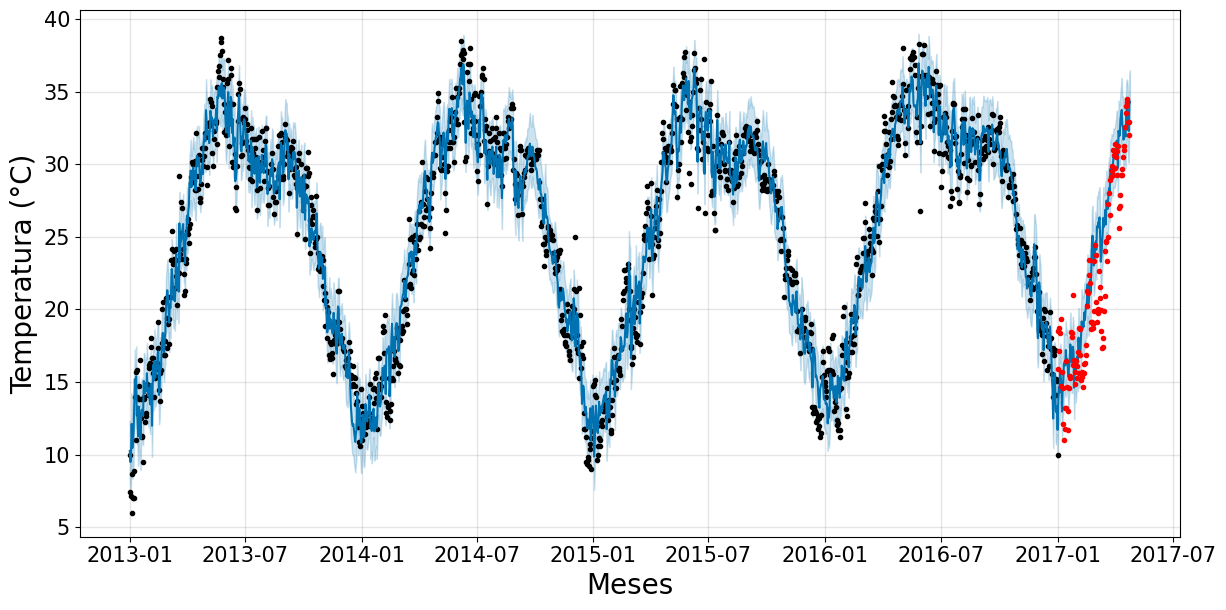

In [35]:
fig = model.plot(predictions, figsize=(12,6))

plt.plot(df_test['ds'], 
         df_test['y'],
         '.r')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Meses', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

In [37]:
mean_absolute_error(df_train['y'], predictions.loc[:1460, 'yhat'])

1.268232325737635

In [36]:
mean_absolute_error(df_test['y'], predictions.loc[1461:, 'yhat'])

2.5985928934913836